# Assignment 6: SLR and DSP pulses




In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys

from scipy.special import j1
def jinc(r):
    #
    return j1(r*np.pi)/(2*r)

def rect(r):
    #1 from -0.5 to 0.5. 
    #rect(r/(2*kmax)) yields 1 from -kmax to kmax. 
    return 0.5*(np.sign(r+0.5) + np.sign(0.5 - r))


1. SLR Pulse Design The mfiles dzls and dzmp provide an interface to the matlab firpm and
firls routines using the relationships we discussed in class.
These should be invoked by

->> bls = dzls(N, tb, delta1, delta2)

->> bpm = dzpm(N, tb, delta1, delta2)

where N is the filter length, tb is the time bandwidth, and delta1 and delta2 are the passband and stopband ripple amplitudes. These use the m-file dinf.m that computes the D∞(δ1, δ2)
function, provided on the class web site.

Once you have BN (z), you can design an RF pulse by computing the corresponding minimum
phase AN (z), and then doing the back recursion. There are m-files b2a.m and ab2rf.m that
perform these functions. The b2a.m routine requires mag2mp.m which is also available on the
web site. To design an RF pulse for a flip angle theta,

->> b = dzls(N,tb,delta1,delta2);

->> bs = b*sin(theta/2);

->> a = b2a(bs);

->> rf = ab2rf(a,bs);

/home/jake/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


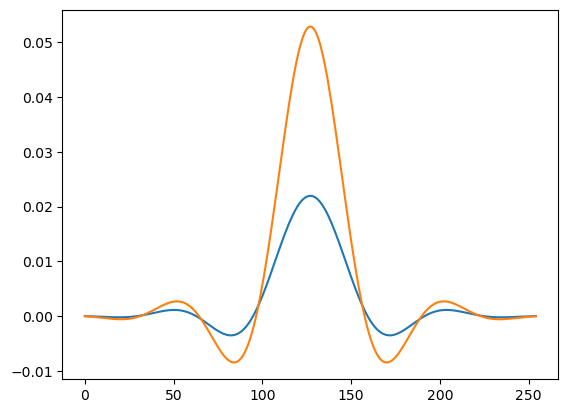

In [ ]:
from dzls import *
from dzmp import * 
from b2a import * 
from ab2rf import *


N = 256
tb = 8
theta = np.pi/2
delta1, delta2 = 0.001, 0.001
b = dzls(N,tb, delta1, delta2)
bs = b*np.sin(theta/2)
a = b2a(bs)
rf =ab2rf(a,bs)   #Is it the minphase that stops working at pi/2 or is it ab2rf with the SLR alg that stops? 

plt.plot(bs)
#plt.plot(a)
plt.plot(rf)


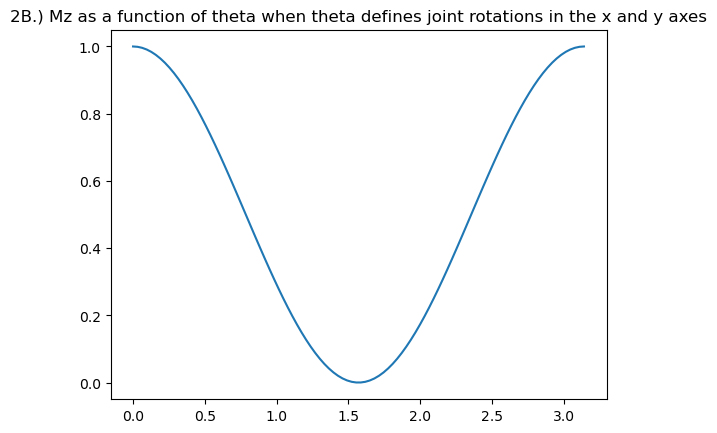

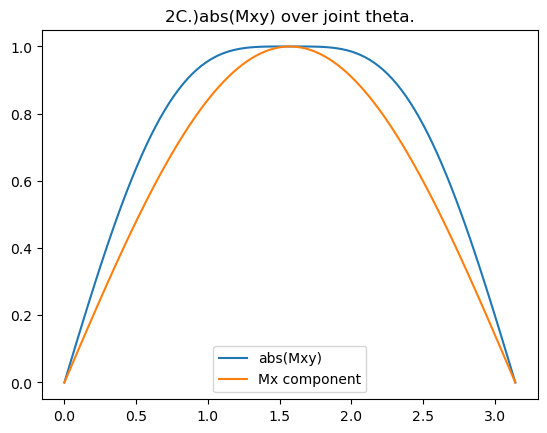

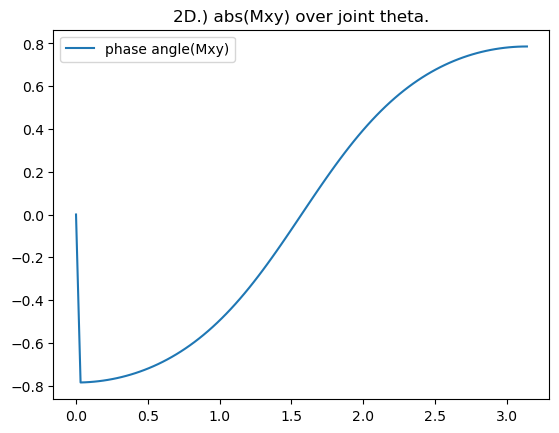

In [ ]:
theta = np.pi# 3/4
theta = np.linspace(0, np.pi, 100)

alpha_1, beta_1 = np.cos(theta/2), -1j*np.sin(theta/2)
alpha_2, beta_2 = np.cos(theta/2), -1j*(1j*1)*np.sin(theta/2)

# Vectorized: construct Q1 and Q2 as arrays of shape (N, 2, 2)
Q1 = np.zeros((len(theta), 2, 2), dtype=complex)
Q1[:, 0, 0] = alpha_1
Q1[:, 0, 1] = -np.conj(beta_1)
Q1[:, 1, 0] = beta_1
Q1[:, 1, 1] = np.conj(alpha_1)

Q2 = np.zeros((len(theta), 2, 2), dtype=complex)
Q2[:, 0, 0] = alpha_2
Q2[:, 0, 1] = -np.conj(beta_2)
Q2[:, 1, 0] = beta_2
Q2[:, 1, 1] = np.conj(alpha_2)

# Batch matrix multiplication: (N, 2, 2) @ (N, 2, 2) -> (N, 2, 2)
#Qf = np.einsum('ijk,ikl->ijl', Q1, Q2)
# Alternatively: Qf = Q1 @ Q2  (this also works with broadcasting in numpy >= 1.10)
#I like the matmul form more than spinor quanternion math.  
Qf = Q1@Q2

alpha_f = Qf[:, 0, 0] 
beta_f = Qf[:, 1, 0]

##magnetization from ab. Look at lecture 8. 
#Mx = (np.conj(alpha), np.conj(beta)) @ [[0,1][1,0]] @ (alpha,beta)
#Mx = np.conj(alpha)*beta + np.conj(beta)*alpha
#
#My = (np.conj(alpha), np.conj(beta)) @ [[0,-1j][1j,0]] @ (alpha,beta)
#My = -1j*np.conj(alpha)*beta + 1j*np.conj(beta)*alpha
#
#Mz = (np.conj(alpha), np.conj(beta)) @ [[1,0][0,-1]] @ (alpha,beta)
#Mz = np.conj(alpha)*alpha - np.conj(beta)*beta
#

Mz = np.conj(alpha_f)*alpha_f - np.conj(beta_f)*beta_f
plt.title("2B.) Mz as a function of theta when theta defines joint rotations in the x and y axes")
plt.plot(theta, np.abs(Mz))
plt.show()

Mxy = 2*np.conj(alpha_f)*beta_f
plt.title("2C.)abs(Mxy) over joint theta.")
plt.plot(theta, np.abs(Mxy), label="abs(Mxy)")
plt.plot(theta, np.real(Mxy), label = 'Mx component')
plt.legend() 
plt.show()

plt.title("2D.) angle(Mxy) over joint theta.")
plt.plot(theta, np.angle(Mxy), label="phase angle(Mxy)")

plt.legend() 
plt.show()



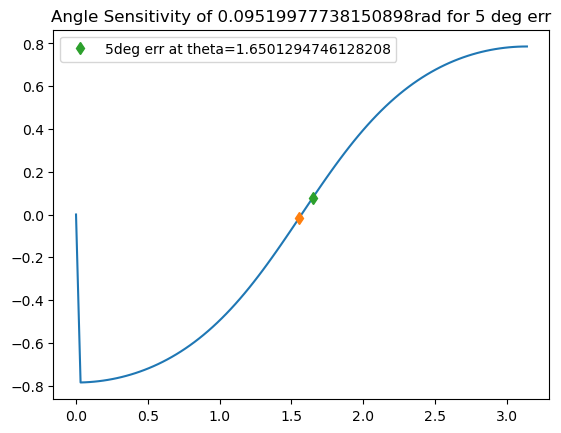

In [46]:
plt.figure()
phase_err = 5/180*np.pi #5deg err
t1 = np.argmin(np.abs(phase_err-np.angle(Mxy)))
t0 = np.argmin(np.abs(0-np.angle(Mxy)[1:]))+1
plt.plot(theta, np.angle(Mxy))
plt.plot(theta[t0],np.angle(Mxy)[t0], 'd')
plt.plot(theta[t1],np.angle(Mxy)[t1], 'd', label=f'5deg err at theta={theta[t1]}')
plt.title(f"Angle Sensitivity of {theta[t1]-theta[t0]}rad for 5 deg err")
plt.legend()

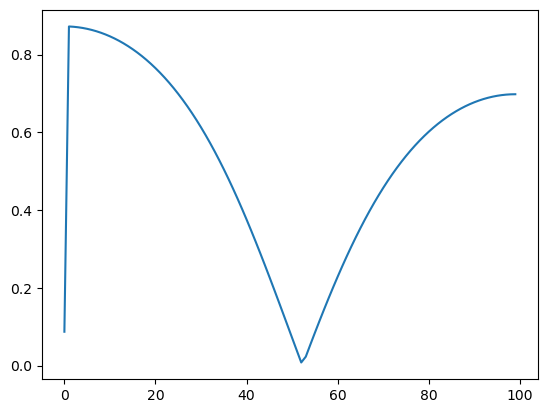

In [38]:
plt.plot(np.abs(phase_err-np.angle(Mxy)))

In [24]:
Mxy

array([0.        +0.00000000e+00j, 0.01586596-1.58639667e-02j,
       0.03172793-3.17119598e-02j, 0.04758192-4.75280217e-02j,
       0.06342392-6.32962268e-02j, 0.07924996-7.90006980e-02j,
       0.09505604-9.46256222e-02j, 0.1108382 -1.10155266e-01j,
       0.12659245-1.25573994e-01j, 0.14231484-1.40866278e-01j,
       0.1580014 -1.56016723e-01j, 0.17364818-1.71010072e-01j,
       0.18925124-1.85831228e-01j, 0.20480667-2.00465268e-01j,
       0.22031053-2.14897456e-01j, 0.23575894-2.29113261e-01j,
       0.25114799-2.43098368e-01j, 0.26647381-2.56838696e-01j,
       0.28173256-2.70320409e-01j, 0.29692038-2.83529932e-01j,
       0.31203345-2.96453965e-01j, 0.32706796-3.09079493e-01j,
       0.34202014-3.21393805e-01j, 0.35688622-3.33384500e-01j,
       0.37166246-3.45039506e-01j, 0.38634513-3.56347086e-01j,
       0.40093054-3.67295854e-01j, 0.41541501-3.77874787e-01j,
       0.42979491-3.88073232e-01j, 0.44406661-3.97880920e-01j,
       0.45822652-4.07287976e-01j, 0.47227107-4.1628492

array([[ 0.70710678+0.j        , -0.        -0.70710678j],
       [ 0.        -0.70710678j,  0.70710678+0.j        ]])

In [10]:
beta_1

-0.7071067811865475j